# CCC to UTMB Evaluation

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/CCC_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Masters Men 1 (40-49),Male,11.246015,15.222938,11.995858,14.050342,14.050399,14.394697
1,1,Senior Men (23-39),Male,21.929566,15.222938,15.726010,16.750925,16.750918,16.442480
2,2,Senior Men (23-39),Male,10.436679,12.416371,11.363543,13.571467,13.571714,13.875511
3,3,Senior Men (23-39),Male,18.033282,13.945114,14.328692,16.382603,16.382770,15.795056
4,4,Senior Men (23-39),Male,17.350464,12.670525,14.945903,16.093129,16.093250,15.758484


In [4]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [5]:
df = df.dropna()

In [6]:
len(df)

2798

# All

In [7]:


abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('Best Error:', abestpb)
print('Mean Error:', ameanpb)
print('Weighted Mean:', aweightpb)
print('Euclidean Weighted Mean:', aeucpb)


Best Error: 2.604249593580667
Mean Error: 1.6443245507568909
Weighted Mean: 1.6444776269801866
Euclidean Weighted Mean: 1.6094907027345027


###  Percentage error

In [8]:
abestper = ((df.pb_error / df.query_pb) * 100).mean()
ameanper = ((df.mean_error / df.query_pb) * 100).mean()
acosper = ((df.cos_error / df.query_pb) * 100).mean()
aeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  13.421023878222494
Mean of Cases Percentage:  8.756593822786922
Cosine Mean %: 8.756291062729094
Euclidean Mean %:  8.61880930181558


# Male

In [9]:
male = df[df.gender == 'Male']

In [10]:
male.count()

Unnamed: 0              2572
category                2572
gender                  2572
query_AVG_Pace          2572
query_pb                2572
best_pb_prediction      2572
mean_pb_average_pace    2572
weighted_mean           2572
euc_weighted_mean       2572
pb_error                2572
mean_error              2572
cos_error               2572
euc_error               2572
dtype: int64

In [11]:

mbestpb = sqrt(mean_squared_error(male.query_pb, male.best_pb_prediction))
mmeanpb = sqrt(mean_squared_error(male.query_pb, male.mean_pb_average_pace))
mweightpb = sqrt(mean_squared_error(male.query_pb, male.weighted_mean))
meucpb = sqrt(mean_squared_error(male.query_pb, male.euc_weighted_mean))

print('Male Best Error:', mbestpb)
print('Male Mean Error:', mmeanpb)
print('Male Weighted Mean Error:', mweightpb)
print('Male Euclidean Weighted Mean Error:', meucpb)

Male Best Error: 2.645692562802831
Male Mean Error: 1.6608872915199138
Male Weighted Mean Error: 1.6610856978332544
Male Euclidean Weighted Mean Error: 1.6251237836430263


###  Percentage error

In [12]:
mbestper = ((male.pb_error / male.query_pb) * 100).mean()
mmeanper = ((male.mean_error / male.query_pb) * 100).mean()
mcosper = ((male.cos_error / male.query_pb) * 100).mean()
meucper = ((male.euc_error / male.query_pb) * 100).mean()

print('Fastest Case Percentage: ', mbestper)
print('Mean of Cases Percentage: ',  mmeanper)
print('Cosine Mean %:',  mcosper)
print('Euclidean Mean %: ', meucper)

Fastest Case Percentage:  13.752781484511594
Mean of Cases Percentage:  8.89543891274179
Cosine Mean %: 8.895077229593982
Euclidean Mean %:  8.747219050883013


# Female

In [13]:
female = df[df.gender == 'Female']

In [14]:
female.count()

Unnamed: 0              226
category                226
gender                  226
query_AVG_Pace          226
query_pb                226
best_pb_prediction      226
mean_pb_average_pace    226
weighted_mean           226
euc_weighted_mean       226
pb_error                226
mean_error              226
cos_error               226
euc_error               226
dtype: int64

In [15]:

fbestpb = sqrt(mean_squared_error(female.query_pb, female.best_pb_prediction))
fmeanpb = sqrt(mean_squared_error(female.query_pb, female.mean_pb_average_pace))
fweightpb = sqrt(mean_squared_error(female.query_pb, female.weighted_mean))
feucpb = sqrt(mean_squared_error(female.query_pb, female.euc_weighted_mean))

print('Female Best Error:', fbestpb)
print('Female Mean Error:', fmeanpb)
print('Female Weighted Mean Error', fweightpb)
print('Female Euclidean Weighted Mean Error:', feucpb)

Female Best Error: 2.075094577160835
Female Mean Error: 1.4424959776394017
Female Weighted Mean Error 1.4420563634477657
Female Euclidean Weighted Mean Error: 1.4195003087572973


###  Percentage error

In [16]:
fbestper = ((female.pb_error / female.query_pb) * 100).mean()
fmeanper = ((female.mean_error / female.query_pb) * 100).mean()
fcosper = ((female.cos_error / female.query_pb) * 100).mean()
feucper = ((female.euc_error / female.query_pb) * 100).mean()

print('Fastest Case Percentage: ', fbestper)
print('Mean of Cases Percentage: ',  fmeanper)
print('Cosine Mean %:',  fcosper)
print('Euclidean Mean %: ', feucper)

Fastest Case Percentage:  9.645446164171268
Mean of Cases Percentage:  7.176462976043866
Cosine Mean %: 7.176830792036645
Euclidean Mean %:  7.157438175260505


In [17]:
mean = [ameanpb, mmeanpb, fmeanpb ]
best = [abestpb, mbestpb, fbestpb]
w_mean = [aweightpb, mweightpb, fweightpb]
euc_mean =[aeucpb, meucpb, feucpb]

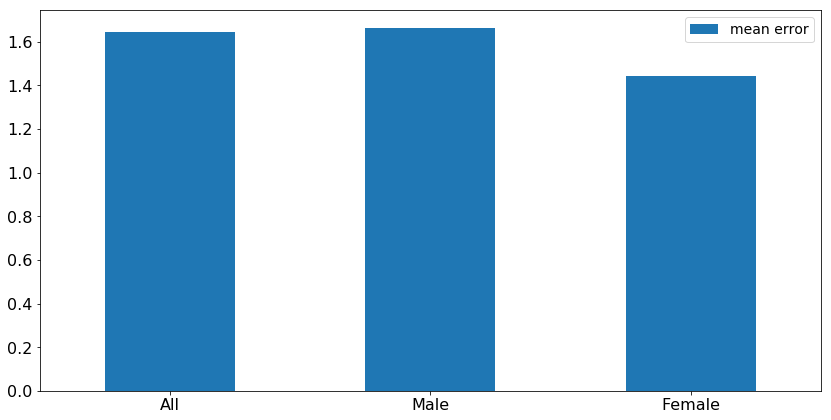

In [18]:
index = ['All', 'Male',  'Female']
gra = pd.DataFrame({'mean error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

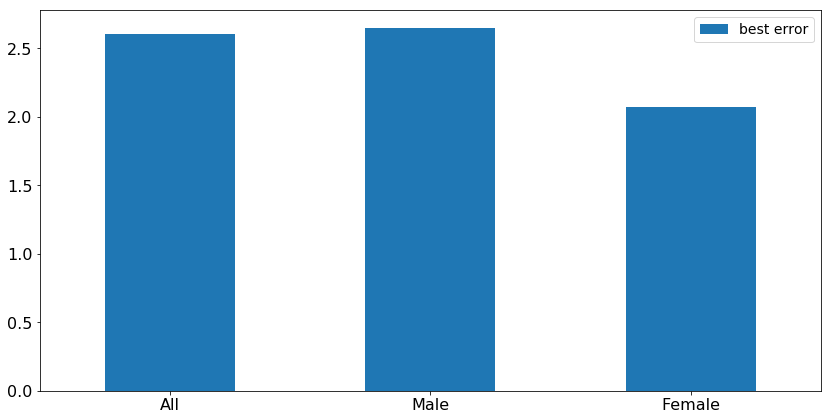

In [19]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'best error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

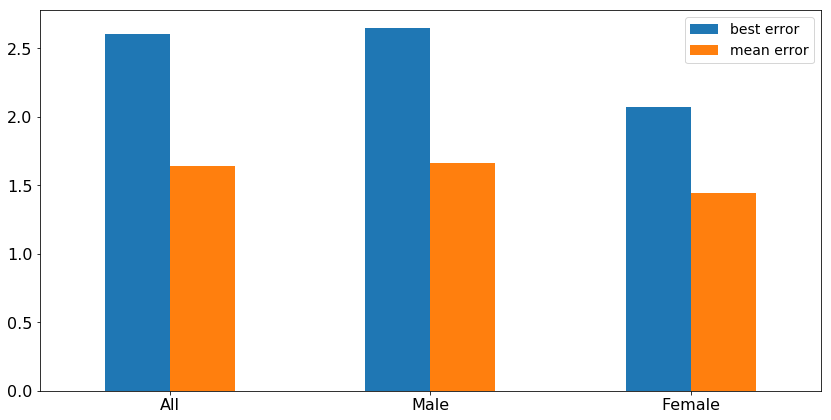

In [20]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'mean error': mean, 'best error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

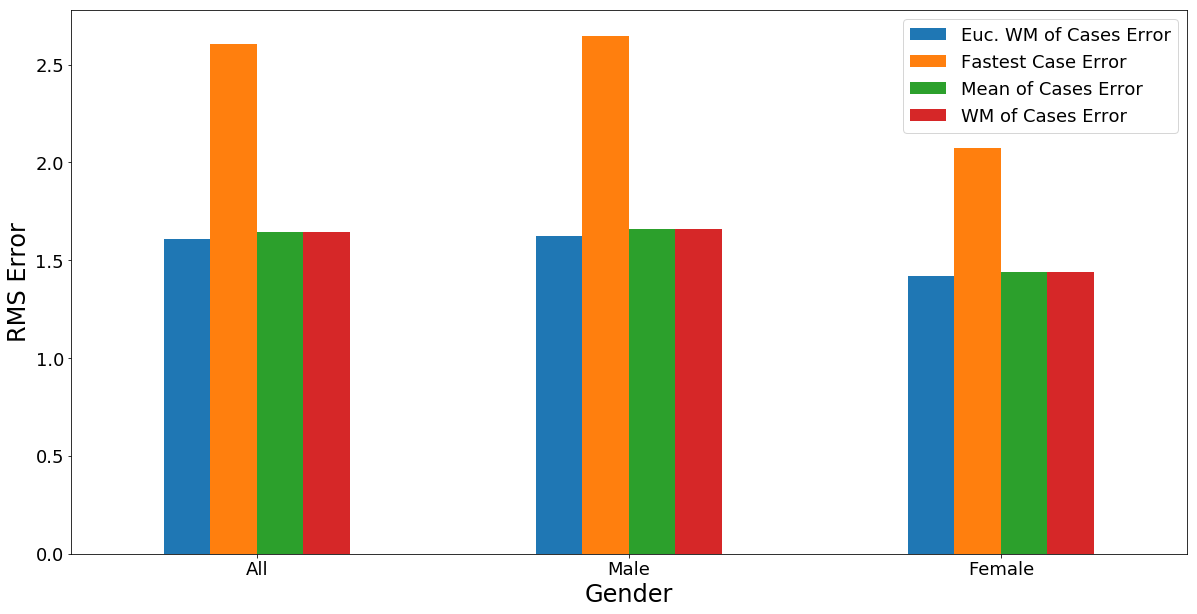

In [21]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Mean of Cases Error': mean, 'Fastest Case Error': best, 'WM of Cases Error': w_mean, 'Euc. WM of Cases Error': euc_mean}, index=index)
ax = gra_w.plot.bar(figsize=(20, 10), fontsize=18, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Gender', fontsize = 24)
ax.legend(fontsize = 18)

In [22]:
mean = [ameanper, mmeanper, fmeanper ]
best = [abestper, mbestper, fbestper]
w_mean = [acosper, mcosper, fcosper]
euc_mean =[aeucper, meucper, feucper]

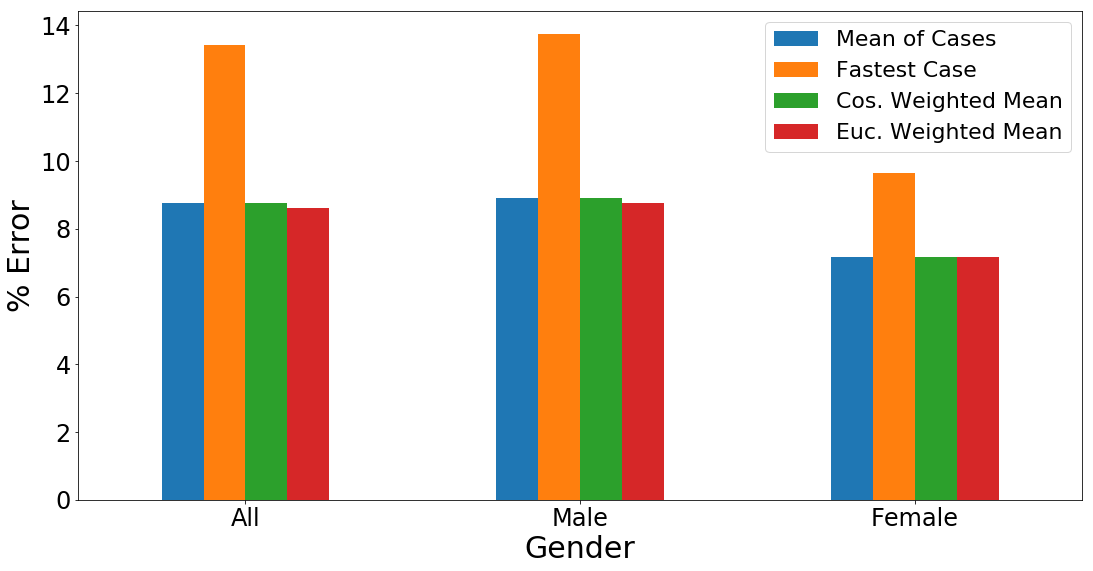

In [23]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Euc. Weighted Mean': euc_mean, 'Fastest Case': best, 'Cos. Weighted Mean': w_mean, 'Mean of Cases': mean}, index=index)
gra_w = gra_w[['Mean of Cases', 'Fastest Case', 'Cos. Weighted Mean', 'Euc. Weighted Mean']]
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=24, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Gender', fontsize = 30)
ax.legend(fontsize = 22)

As previously stated, the runners of the CCC may be the people in most of need of these predictions. Historical CCC races were used to predict UTMB PB average paces.
Overall, the percentage error is worse than when the historical UTMB non PB average pace were
used to predict a PB average pace. However, that being said, the predictions are still quite good.
The mean of cases error is just over 8% for males and just under 7% for females. This bodes
well for female runners, as there is a far higher ratio of females to males in the CCC race, so
these predictions would be extremely useful for them. Once again, the euclidean distance weighted
means are producing the best results. The fastest case error produces quite poor results at around
14%.


# Categories

In [24]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [25]:


snrB = sqrt(mean_squared_error(sen.query_pb, sen.best_pb_prediction))
snrM = sqrt(mean_squared_error(sen.query_pb, sen.mean_pb_average_pace))

mas1B = sqrt(mean_squared_error(mas.query_pb, mas.best_pb_prediction))
mas1M = sqrt(mean_squared_error(mas.query_pb, mas.mean_pb_average_pace))

mas2B = sqrt(mean_squared_error(mas2.query_pb, mas2.best_pb_prediction))
mas2M = sqrt(mean_squared_error(mas2.query_pb, mas2.mean_pb_average_pace))

mas3B = sqrt(mean_squared_error(mas3.query_pb, mas3.best_pb_prediction))
mas3M = sqrt(mean_squared_error(mas3.query_pb, mas3.mean_pb_average_pace))

wom1B = sqrt(mean_squared_error(wom1.query_pb, wom1.best_pb_prediction))
wom1M = sqrt(mean_squared_error(wom1.query_pb, wom1.mean_pb_average_pace))

wom2B = sqrt(mean_squared_error(wom2.query_pb, wom2.best_pb_prediction))
wom2M = sqrt(mean_squared_error(wom2.query_pb, wom2.mean_pb_average_pace))

senWB = sqrt(mean_squared_error(senW.query_pb, senW.best_pb_prediction))
senWM = sqrt(mean_squared_error(senW.query_pb, senW.mean_pb_average_pace))

youB = sqrt(mean_squared_error(you.query_pb, you.best_pb_prediction))
youM = sqrt(mean_squared_error(you.query_pb, you.mean_pb_average_pace))

print('Senior Men Best Error:', snrB)
print('Senior Men Mean Error:', snrM)
print('Master 1 Best Error:', mas1B)
print('Master 1 Mean Error:', mas1M)
print('Master 2 Best Error:', mas2B)
print('Master 2 Mean Error:', mas2M)
print('Master 3 Best Error:', mas3B)
print('Master 3 Mean Error:', mas3M)
print('Master Women 1 Best Error:', wom1B)
print('Master Women 1 Mean Error:', wom1M)
print('Master Women 2 Best Error:', wom2B)
print('Master Women 2 Mean Error:', wom2M)
print('Senior Women Best Error:', senWB)
print('Senior Women Mean Error:', senWM)
print('Youth Men Best Error:', youB)
print('Youth Men Mean Error:', youM)

Senior Men Best Error: 2.9845833328865083
Senior Men Mean Error: 1.7703233954369972
Master 1 Best Error: 2.421319412713359
Master 1 Mean Error: 1.5919983949237808
Master 2 Best Error: 1.8297274785640754
Master 2 Mean Error: 1.3110633857832954
Master 3 Best Error: 2.1152193068895255
Master 3 Mean Error: 1.5220992056876577
Master Women 1 Best Error: 1.8353872648107548
Master Women 1 Mean Error: 1.4892351975261935
Master Women 2 Best Error: 1.4458282812839356
Master Women 2 Mean Error: 0.9025073930672483
Senior Women Best Error: 2.4614813114892944
Senior Women Mean Error: 1.5288916157860826
Youth Men Best Error: 4.190001304981404
Youth Men Mean Error: 3.1331049775480335


In [26]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

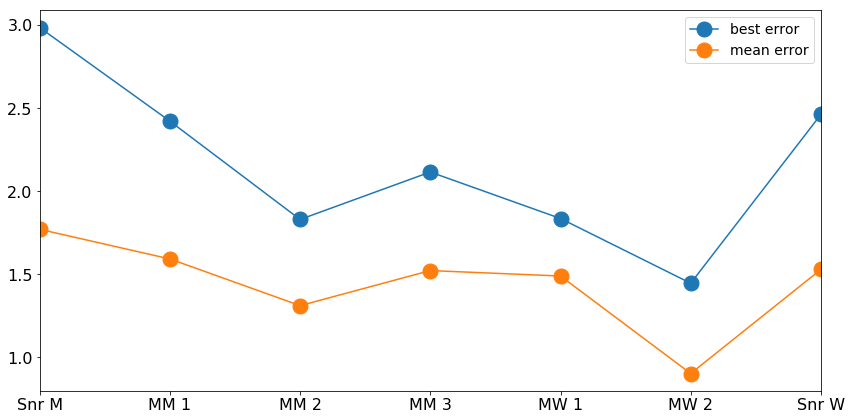

In [27]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'mean error': mean1, 'best error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [28]:
g9 = df[(df.query_pb <= 9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13) & (df.query_pb <= 15)]
g17 = df[(df.query_pb > 15) & (df.query_pb <= 17)]
g19 = df[(df.query_pb > 17)]

## Bin counts

In [29]:
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]
g17count = g17.shape[0]
g19count = g19.shape[0]

In [30]:
count = [g9count, g11count, g13count, g15count, g17count, g19count]

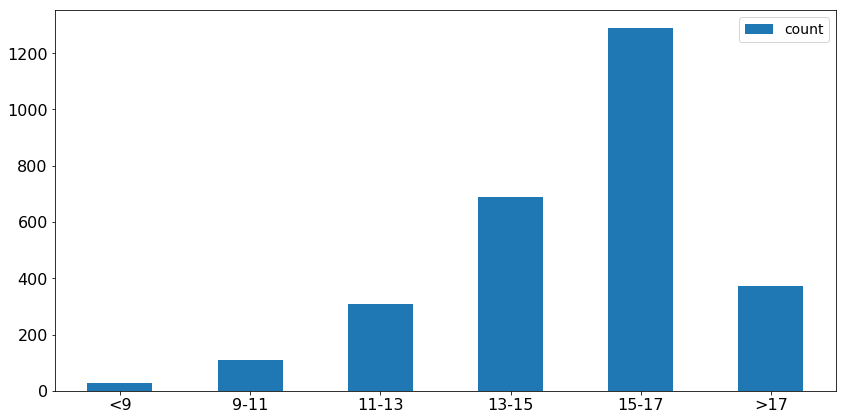

In [31]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [32]:


g9B = sqrt(mean_squared_error(g9.query_pb, g9.best_pb_prediction))
g9M = sqrt(mean_squared_error(g9.query_pb, g9.mean_pb_average_pace))

g11B = sqrt(mean_squared_error(g11.query_pb, g11.best_pb_prediction))
g11M = sqrt(mean_squared_error(g11.query_pb, g11.mean_pb_average_pace))

g13B = sqrt(mean_squared_error(g13.query_pb, g13.best_pb_prediction))
g13M = sqrt(mean_squared_error(g13.query_pb, g13.mean_pb_average_pace))

g15B = sqrt(mean_squared_error(g15.query_pb, g15.best_pb_prediction))
g15M = sqrt(mean_squared_error(g15.query_pb, g15.mean_pb_average_pace))

g17B = sqrt(mean_squared_error(g17.query_pb, g17.best_pb_prediction))
g17M = sqrt(mean_squared_error(g17.query_pb, g17.mean_pb_average_pace))

g19B = sqrt(mean_squared_error(g19.query_pb, g19.best_pb_prediction))
g19M = sqrt(mean_squared_error(g19.query_pb, g19.mean_pb_average_pace))


print('U9 Best Error:', g9B)
print('U9 Mean Error:', g9M)
print('9-11 Best Error:', g11B)
print('9-11 Mean Error:', g11M)
print('11-13 Best Error:', g13B)
print('11-13 Mean Error:', g13M)
print('13-15 Best Error:', g15B)
print('13-15 Mean Error:', g15M)
print('15-17 Best Error:', g17B)
print('15-17 Mean Error:', g17M)
print('O17 Best Error:', g19B)
print('017 Mean Error:', g19M)

U9 Best Error: 1.915772584091576
U9 Mean Error: 2.828676993676298
9-11 Best Error: 1.8519584438554524
9-11 Mean Error: 2.7964843873426437
11-13 Best Error: 1.8692309995248657
11-13 Mean Error: 2.0063889339091796
13-15 Best Error: 2.008994881658572
13-15 Mean Error: 1.3084506707573347
15-17 Best Error: 2.6452178703918787
15-17 Mean Error: 1.192103150774809
O17 Best Error: 3.8893934576512232
017 Mean Error: 2.4425089877544575


In [33]:
mean2 = [g9M, g11M, g13M, g15M, g17M, g19M]
best2 = [g9B, g11B, g13B, g15B, g17B, g19B]

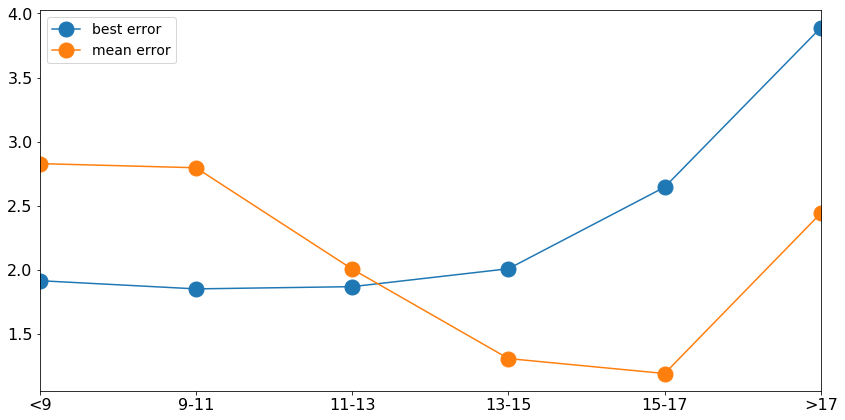

In [34]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra4 = pd.DataFrame({'mean error': mean2, 'best error': best2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Male Ability

In [35]:
maleg9 = male[(male.query_pb <= 9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13) & (male.query_pb <= 15)]
maleg17 = male[(male.query_pb > 15) & (male.query_pb <= 17)]
maleg19 = male[(male.query_pb > 17)]

## Bin counts

In [36]:
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]
maleg17count = maleg17.shape[0]
maleg19count = maleg19.shape[0]

In [37]:
print(maleg9count) 
print(maleg11count )
print(maleg13count)
print(maleg15count) 
print(maleg17count) 
print(maleg19count) 

29
102
296
649
1169
327


In [38]:
count1 = [maleg9count, maleg11count, maleg13count, maleg15count, maleg17count, maleg19count]

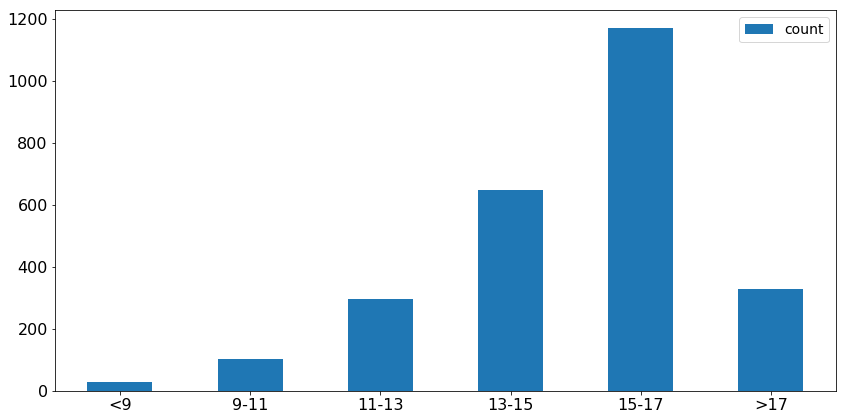

In [39]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra8 = pd.DataFrame({'count': count1}, index=index)
ax = gra8.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [40]:

maleg9B = sqrt(mean_squared_error(maleg9.query_pb, maleg9.best_pb_prediction))
maleg9M = sqrt(mean_squared_error(maleg9.query_pb, maleg9.mean_pb_average_pace))

maleg11B = sqrt(mean_squared_error(maleg11.query_pb, maleg11.best_pb_prediction))
maleg11M = sqrt(mean_squared_error(maleg11.query_pb, maleg11.mean_pb_average_pace))

maleg13B = sqrt(mean_squared_error(maleg13.query_pb, maleg13.best_pb_prediction))
maleg13M = sqrt(mean_squared_error(maleg13.query_pb, maleg13.mean_pb_average_pace))

maleg15B = sqrt(mean_squared_error(maleg15.query_pb, maleg15.best_pb_prediction))
maleg15M = sqrt(mean_squared_error(maleg15.query_pb, maleg15.mean_pb_average_pace))

maleg17B = sqrt(mean_squared_error(maleg17.query_pb, maleg17.best_pb_prediction))
maleg17M = sqrt(mean_squared_error(maleg17.query_pb, maleg17.mean_pb_average_pace))

maleg19B = sqrt(mean_squared_error(maleg19.query_pb, maleg19.best_pb_prediction))
maleg19M = sqrt(mean_squared_error(maleg19.query_pb, maleg19.mean_pb_average_pace))

maleg9W = sqrt(mean_squared_error(maleg9.query_pb, maleg9.weighted_mean))
maleg9E = sqrt(mean_squared_error(maleg9.query_pb, maleg9.euc_weighted_mean))

maleg11W = sqrt(mean_squared_error(maleg11.query_pb, maleg11.weighted_mean))
maleg11E = sqrt(mean_squared_error(maleg11.query_pb, maleg11.euc_weighted_mean))

maleg13W = sqrt(mean_squared_error(maleg13.query_pb, maleg13.weighted_mean))
maleg13E = sqrt(mean_squared_error(maleg13.query_pb, maleg13.euc_weighted_mean))

maleg15W = sqrt(mean_squared_error(maleg15.query_pb, maleg15.weighted_mean))
maleg15E = sqrt(mean_squared_error(maleg15.query_pb, maleg15.euc_weighted_mean))

maleg17W = sqrt(mean_squared_error(maleg17.query_pb, maleg17.weighted_mean))
maleg17E = sqrt(mean_squared_error(maleg17.query_pb, maleg17.euc_weighted_mean))

maleg19W = sqrt(mean_squared_error(maleg19.query_pb, maleg19.weighted_mean))
maleg19E = sqrt(mean_squared_error(maleg19.query_pb, maleg19.euc_weighted_mean))


print('Male U9 Best Error:', maleg9B)
print('Male U9 Mean Error:', maleg9M)
print('Male 9-11 Best Error:', maleg11B)
print('Male 9-11 Mean Error:', maleg11M)
print('Male 11-13 Best Error:', maleg13B)
print('Male 11-13 Mean Error:', maleg13M)
print('Male 13-15 Best Error:', maleg15B)
print('Male 13-15 Mean Error:', maleg15M)
print('Male 15-17 Best Error:', maleg17B)
print('Male 15-17 Mean Error:', maleg17M)
print('Male O17 Best Error:', maleg19B)
print('Male 017 Mean Error:', maleg19M)

Male U9 Best Error: 1.915772584091576
Male U9 Mean Error: 2.828676993676298
Male 9-11 Best Error: 1.8357046064445612
Male 9-11 Mean Error: 2.7580994562258287
Male 11-13 Best Error: 1.8658301889453153
Male 11-13 Mean Error: 2.001881488603262
Male 13-15 Best Error: 2.0282268155647154
Male 13-15 Mean Error: 1.2833850341328323
Male 15-17 Best Error: 2.7203950442264904
Male 15-17 Mean Error: 1.2236062516697503
Male O17 Best Error: 3.988338133099096
Male 017 Mean Error: 2.52303906052335


###  Percentage

In [41]:
mgb9_per = ((maleg9.pb_error / maleg9.query_pb) * 100).mean()
mgm9_per = ((maleg9.mean_error / maleg9.query_pb) * 100).mean()

mgb11_per = ((maleg11.pb_error / maleg11.query_pb) * 100).mean()
mgm11_per = ((maleg11.mean_error / maleg11.query_pb) * 100).mean()

mgb13_per = ((maleg13.pb_error / maleg13.query_pb) * 100).mean()
mgm13_per = ((maleg13.mean_error / maleg13.query_pb) * 100).mean()

mgb15_per = ((maleg15.pb_error / maleg15.query_pb) * 100).mean()
mgm15_per = ((maleg15.mean_error / maleg15.query_pb) * 100).mean()

mgb17_per = ((maleg17.pb_error / maleg17.query_pb) * 100).mean()
mgm17_per = ((maleg17.mean_error / maleg17.query_pb) * 100).mean()

mgb19_per = ((maleg19.pb_error / maleg19.query_pb) * 100).mean()
mgm19_per = ((maleg19.mean_error / maleg19.query_pb) * 100).mean()

print(mgb9_per)
print(mgm9_per)
print(mgb11_per)
print(mgm11_per)
print(mgb13_per)
print(mgm13_per)
print(mgb15_per)
print(mgm15_per)
print(mgb17_per)
print(mgm17_per)
print(mgb19_per)
print(mgm19_per)

15.889558707451851
29.51390510379988
13.897604493118537
22.47640921398597
12.114631901136244
13.821400322637677
11.090028962832186
7.510619136491237
13.80945085796694
5.7393440588940585
20.083159708782066
12.402912464233568


In [42]:
mge9_per = ((maleg9.euc_error / maleg9.query_pb) * 100).mean()

mge11_per = ((maleg11.euc_error / maleg11.query_pb) * 100).mean()

mge13_per = ((maleg13.euc_error / maleg13.query_pb) * 100).mean()

mge15_per = ((maleg15.euc_error / maleg15.query_pb) * 100).mean()

mge17_per = ((maleg17.euc_error / maleg17.query_pb) * 100).mean()

mge19_per = ((maleg19.euc_error / maleg19.query_pb) * 100).mean()

In [43]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
wei3 = [maleg9W, maleg11W, maleg13W, maleg15W, maleg17W, maleg19W]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

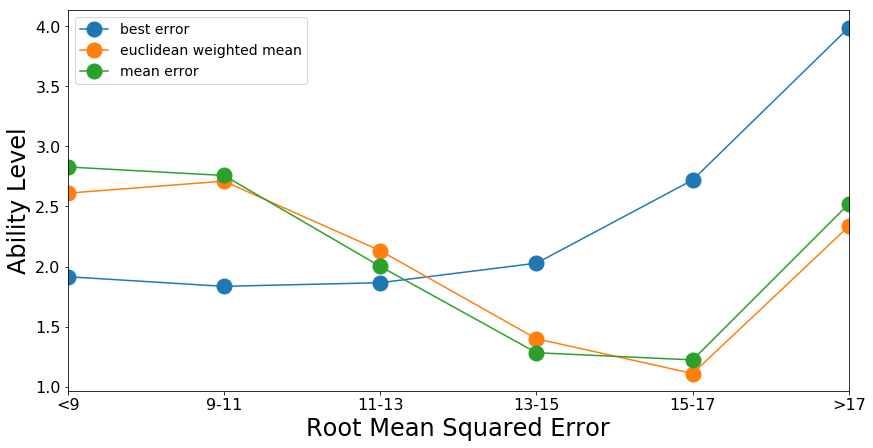

In [44]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'mean error': mean3, 'best error': best3,  'euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Female Ability

In [45]:
femaleg9 = female[(female.query_pb <= 9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13) & (female.query_pb <= 15)]
femaleg17 = female[(female.query_pb > 15) & (female.query_pb <= 17)]
femaleg19 = female[(female.query_pb > 17)]

## Bin counts

In [46]:
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]
femaleg17count = femaleg17.shape[0]
femaleg19count = femaleg19.shape[0]

In [47]:
print(femaleg9count) 
print(femaleg11count )
print(femaleg13count)
print(femaleg15count) 
print(femaleg17count) 
print(femaleg19count) 

0
8
14
41
119
44


In [48]:
count1 = [femaleg9count, femaleg11count, femaleg13count, femaleg15count, femaleg17count, femaleg19count]

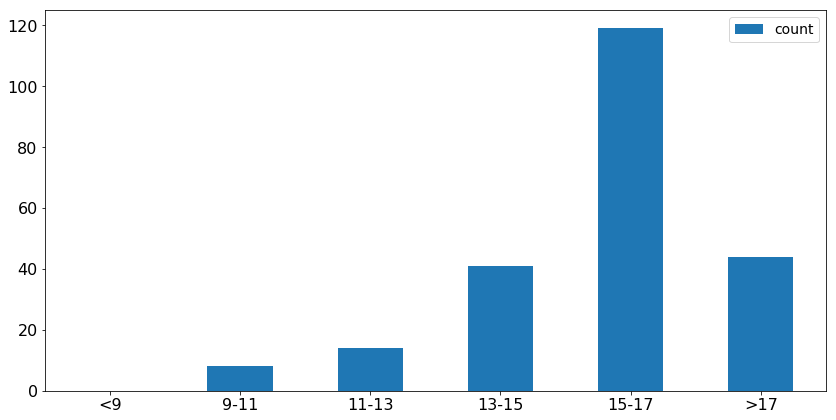

In [49]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'count': count1}, index=index)
ax = gra9.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [50]:


#femaleg9B = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.best_pb_prediction))
#femaleg9M = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.mean_pb_average_pace))

femaleg11B = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.best_pb_prediction))
femaleg11M = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.mean_pb_average_pace))

femaleg13B = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.best_pb_prediction))
femaleg13M = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.mean_pb_average_pace))

femaleg15B = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.best_pb_prediction))
femaleg15M = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.mean_pb_average_pace))

femaleg17B = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.best_pb_prediction))
femaleg17M = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.mean_pb_average_pace))

femaleg19B = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.best_pb_prediction))
femaleg19M = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.mean_pb_average_pace))

#femaleg9W = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.weighted_mean))
#femaleg9E = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.euc_weighted_mean))

femaleg11W = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.weighted_mean))
femaleg11E = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.euc_weighted_mean))

femaleg13W = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.weighted_mean))
femaleg13E = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.euc_weighted_mean))

femaleg15W = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.weighted_mean))
femaleg15E = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.euc_weighted_mean))

femaleg17W = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.weighted_mean))
femaleg17E = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.euc_weighted_mean))

femaleg19W = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.weighted_mean))
femaleg19E = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.euc_weighted_mean))


#print('female U9 Best Error:', femaleg9B)
#print('female U9 Mean Error:', femaleg9M)
print('female 9-11 Best Error:', femaleg11B)
print('female 9-11 Mean Error:', femaleg11M)
print('female 11-13 Best Error:', femaleg13B)
print('female 11-13 Mean Error:', femaleg13M)
print('female 13-15 Best Error:', femaleg15B)
print('female 13-15 Mean Error:', femaleg15M)
print('female 15-17 Best Error:', femaleg17B)
print('female 15-17 Mean Error:', femaleg17M)
print('female O17 Best Error:', femaleg19B)
print('female 017 Mean Error:', femaleg19M)

female 9-11 Best Error: 2.0479180140451265
female 9-11 Mean Error: 3.2463490240468635
female 11-13 Best Error: 1.939738663422605
female 11-13 Mean Error: 2.099425115682564
female 13-15 Best Error: 1.6754161757972614
female 13-15 Mean Error: 1.6554176485622127
female 15-17 Best Error: 1.7420231513584155
female 15-17 Mean Error: 0.8206804346941133
female O17 Best Error: 3.055254404218997
female 017 Mean Error: 1.730330844605911


In [51]:
fgb9_per = ((femaleg9.pb_error / femaleg9.query_pb) * 100).mean()
fgm9_per = ((femaleg9.mean_error / femaleg9.query_pb) * 100).mean()

fgb11_per = ((femaleg11.pb_error / femaleg11.query_pb) * 100).mean()
fgm11_per = ((femaleg11.mean_error / femaleg11.query_pb) * 100).mean()

fgb13_per = ((femaleg13.pb_error / femaleg13.query_pb) * 100).mean()
fgm13_per = ((femaleg13.mean_error / femaleg13.query_pb) * 100).mean()

fgb15_per = ((femaleg15.pb_error / femaleg15.query_pb) * 100).mean()
fgm15_per = ((femaleg15.mean_error / femaleg15.query_pb) * 100).mean()

fgb17_per = ((femaleg17.pb_error / femaleg17.query_pb) * 100).mean()
fgm17_per = ((femaleg17.mean_error / femaleg17.query_pb) * 100).mean()

fgb19_per = ((femaleg19.pb_error / femaleg19.query_pb) * 100).mean()
fgm19_per = ((femaleg19.mean_error / femaleg19.query_pb) * 100).mean()

print(fgb9_per)
print(fgm9_per)
print(fgb11_per)
print(fgm11_per)
print(fgb13_per)
print(fgm13_per)
print(fgb15_per)
print(fgm15_per)
print(fgb17_per)
print(fgm17_per)
print(fgb19_per)
print(fgm19_per)

nan
nan
14.620474648806866
26.31032797325972
13.013441007346001
11.175965594264843
9.501963486942111
10.454987827441363
7.069501588794957
3.719930483637083
14.769719767685917
8.718369590959517


In [52]:
fge9_per = ((femaleg9.euc_error / femaleg9.query_pb) * 100).mean()

fge11_per = ((femaleg11.euc_error / femaleg11.query_pb) * 100).mean()

fge13_per = ((femaleg13.euc_error / femaleg13.query_pb) * 100).mean()

fge15_per = ((femaleg15.euc_error / femaleg15.query_pb) * 100).mean()

fge17_per = ((femaleg17.euc_error / femaleg17.query_pb) * 100).mean()

fge19_per = ((femaleg19.euc_error / femaleg19.query_pb) * 100).mean()

In [53]:
mean4 = [ femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [ femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
wei4 = [ femaleg11W, femaleg13W, femaleg15W, femaleg17W, femaleg19W]
euc4 = [ femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

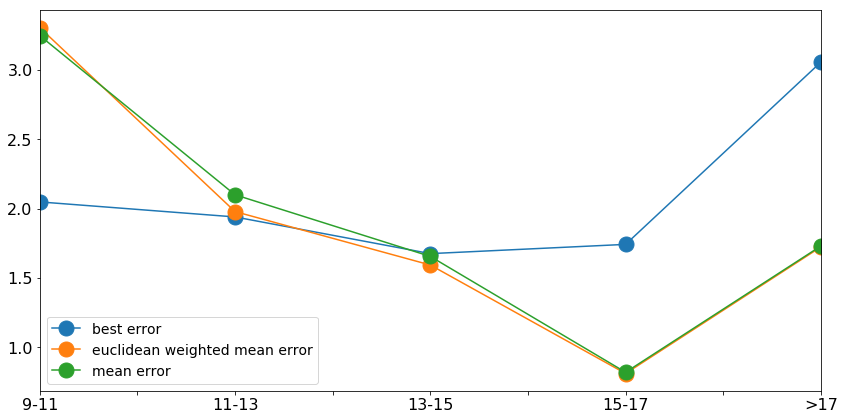

In [54]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'mean error': mean4, 'best error': best4, 'euclidean weighted mean error': euc4}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Males vs Females

In [57]:
mean4 = [femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [ femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [ femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [58]:
mean3 = [ maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [ maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [ maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

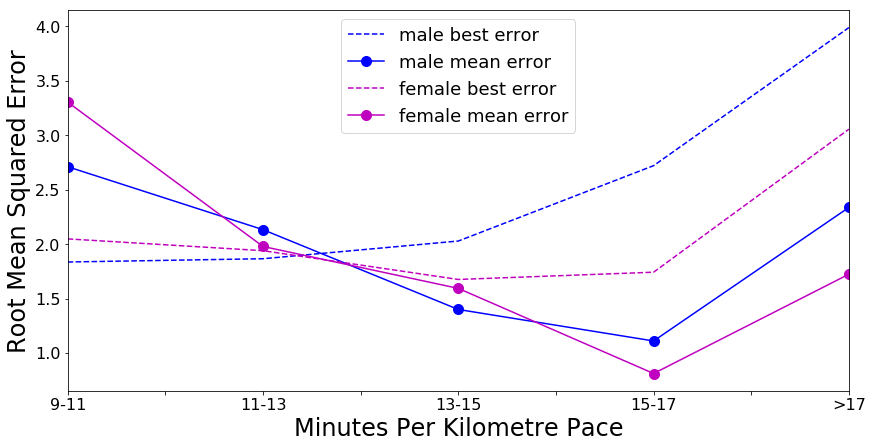

In [59]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male mean error': euc3, 'male best error': best3}, index=index)
gra15 = pd.DataFrame({'female mean error': euc4, 'female best error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Minutes Per Kilometre Pace', fontsize = 24)
ax.legend(fontsize = 18, loc = 'upper center')
#testdataframe2.plot(style=styles2, ax=ax)

In [60]:
mean8 = [fgm11_per, fgm13_per, fgm15_per, fgm17_per, fgm19_per]
best8 = [ fgb11_per, fgb13_per, fgb15_per, fgb17_per, fgb19_per]
euc8 = [ fge11_per, fge13_per, fge15_per, fge17_per, fge19_per]

In [61]:
mean9 = [ mgm11_per, mgm13_per, mgm15_per, mgm17_per, mgm19_per]
best9 = [ mgb11_per, mgb13_per, mgb15_per, mgb17_per, mgb19_per]
euc9 = [ mge11_per, mge13_per, mge15_per, mge17_per, mge19_per]

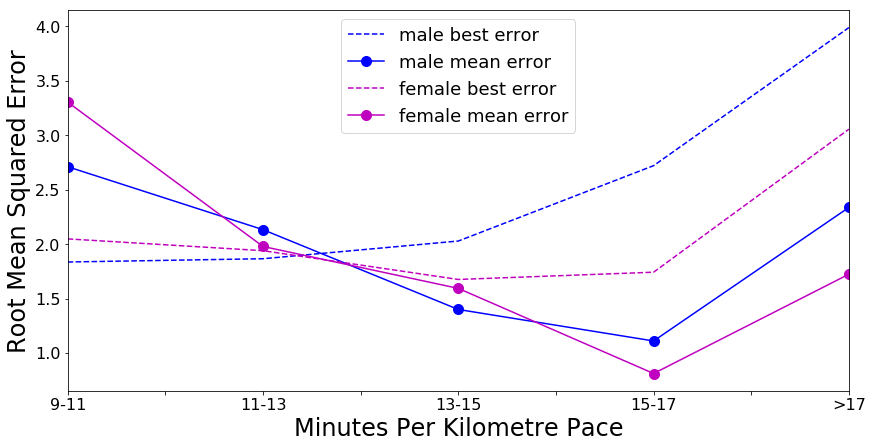

In [62]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male mean error': euc3, 'male best error': best3}, index=index)
gra15 = pd.DataFrame({'female mean error': euc4, 'female best error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Minutes Per Kilometre Pace', fontsize = 24)
ax.legend(fontsize = 18, loc = 'upper center')

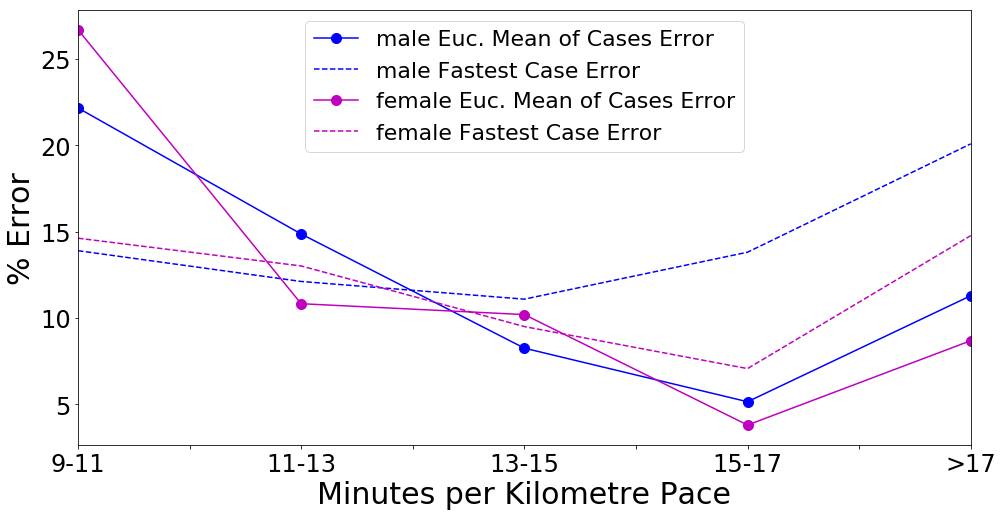

In [63]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'male Euc. Mean of Cases Error': euc9, 'male Fastest Case Error': best9}, index=index)
gra8 = pd.DataFrame({'female Euc. Mean of Cases Error': euc8, 'female Fastest Case Error': best8}, index=index)
styles1 = ['bo-','b--']
styles2 = ['mo-','m--']
fig, ax = plt.subplots()
gra9.plot(style=styles1, ax=ax, figsize = (16, 8), fontsize = 24, ms=10)
gra8.plot(style=styles2, ax=ax, figsize = (16, 8), fontsize = 24, ms=10)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Minutes per Kilometre Pace', fontsize = 30)
ax.legend(fontsize = 22)
#testdataframe2.plot(style=styles2, ax=ax)

Ability was then examined using the predictions from the historical CCC average paces.
Interestingly, no runner that has ran the CCC has gone on to run the UTMB in less than 9 minutes
per kilometre. This would indicate that the more elite runners tend to run the UTMB without
running the CCC. For the less elite runners, it has become something of a prerequisite. The same
trends can be identified as the UTMB predictions. The fastest case error is better for the faster
runners, predictions are around the same for the 13-15 group, and the mean of cases error is
better for the slower runners. Again, the lowest percentage error is at the 15-17 group, with less
than 5%. This is encouraging for any runners who aim to be within this bracket.

# Categorical Ability

## Senior Men Ability

In [66]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [67]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [68]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

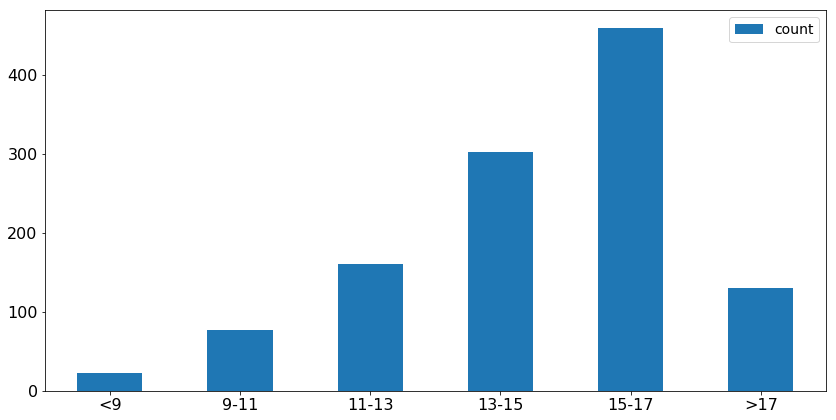

In [69]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [70]:

sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_average_pace))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_average_pace))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_average_pace))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_average_pace))

sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_average_pace))

sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_average_pace))


print('Sen U9 Best Error:', sg9B)
print('Sen U9 Mean Error:', sg9M)
print('Sen 9-11 Best Error:', sg11B)
print('Sen 9-11 Mean Error:', sg11M)
print('Sen 11-13 Best Error:', sg13B)
print('Sen 11-13 Mean Error:', sg13M)
print('Sen 13-15 Best Error:', sg15B)
print('Sen 13-15 Mean Error:', sg15M)
print('Sen 15-17 Best Error:', sg17B)
print('Sen 15-17 Mean Error:', sg17M)
print('Sen O17 Best Error:', sg19B)
print('Sen 017 Mean Error:', sg19M)

Sen U9 Best Error: 1.4200202804723179
Sen U9 Mean Error: 2.3362383889947704
Sen 9-11 Best Error: 1.5829274058626348
Sen 9-11 Mean Error: 2.6383289493029034
Sen 11-13 Best Error: 2.0642427988642864
Sen 11-13 Mean Error: 1.7967471117112588
Sen 13-15 Best Error: 2.4717410714800496
Sen 13-15 Mean Error: 1.2877328124038239
Sen 15-17 Best Error: 3.2206135541703764
Sen 15-17 Mean Error: 1.407675149985212
Sen O17 Best Error: 4.58134568677779
Sen 017 Mean Error: 2.8016407522197038


In [71]:
mean5 = [sg9M, sg11M, sg13M, sg15M, sg17M, sg19M]
best5 = [sg9B, sg11B, sg13B, sg15B, sg17B, sg19B]

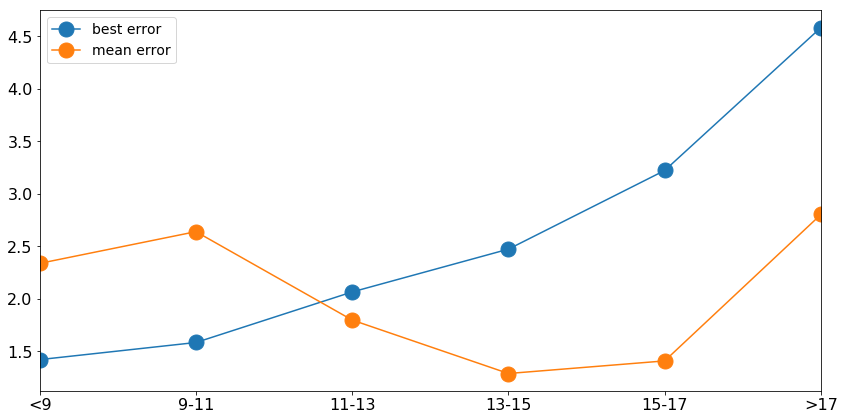

In [72]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra12 = pd.DataFrame({'mean error': mean5, 'best error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [73]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [74]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [75]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

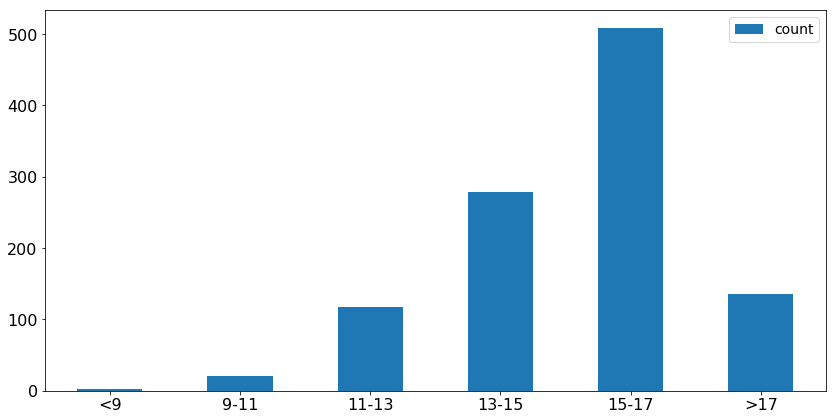

In [76]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [77]:


mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_average_pace))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_average_pace))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_average_pace))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_average_pace))

mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_average_pace))

mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_average_pace))


print('Mas U9 Best Error:', mg9B)
print('Mas U9 Mean Error:', mg9M)
print('Mas 9-11 Best Error:', mg11B)
print('Mas 9-11 Mean Error:', mg11M)
print('Mas 11-13 Best Error:', mg13B)
print('Mas 11-13 Mean Error:', mg13M)
print('Mas 13-15 Best Error:', mg15B)
print('Mas 13-15 Mean Error:', mg15M)
print('Mas 15-17 Best Error:', mg17B)
print('Mas 15-17 Mean Error:', mg17M)
print('Mas O17 Best Error:', mg19B)
print('Mas 017 Mean Error:', mg19M)

Mas U9 Best Error: 1.4367405372118893
Mas U9 Mean Error: 2.478688210470838
Mas 9-11 Best Error: 2.309996334783449
Mas 9-11 Mean Error: 3.043779393228546
Mas 11-13 Best Error: 1.5240228360401649
Mas 11-13 Mean Error: 2.1627752023467646
Mas 13-15 Best Error: 1.5460093088416749
Mas 13-15 Mean Error: 1.1810237360718372
Mas 15-17 Best Error: 2.4953418804239105
Mas 15-17 Mean Error: 1.158616326262258
Mas O17 Best Error: 3.8520204471557413
Mas 017 Mean Error: 2.5224117910159585


In [78]:
mean6 = [mg9M, mg11M, mg13M, mg15M, mg17M, mg19M]
best6 = [mg9B, mg11B, mg13B, mg15B, mg17B, mg19B]

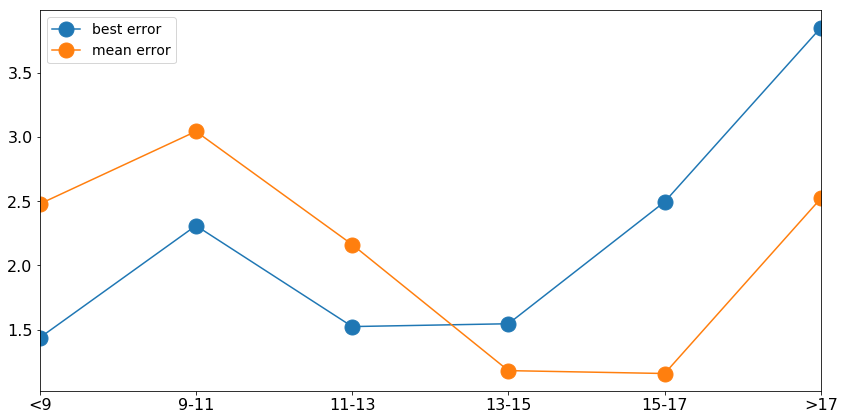

In [79]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra13 = pd.DataFrame({'mean error': mean6, 'best error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [80]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [81]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [82]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

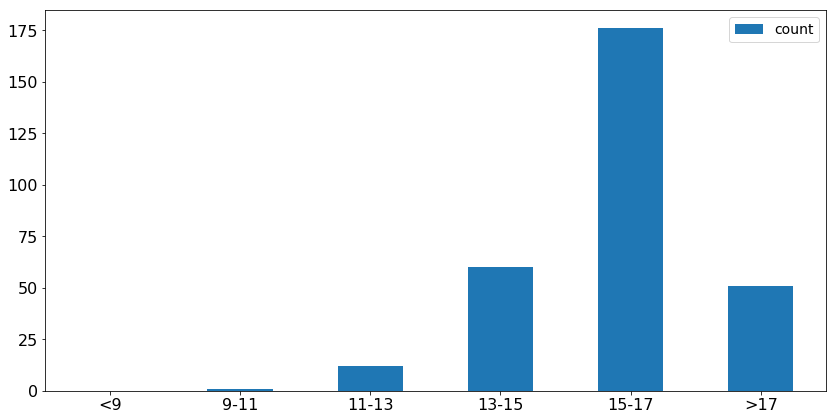

In [83]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [84]:


#m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
#m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_average_pace))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_average_pace))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_average_pace))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_average_pace))

m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_average_pace))

m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_average_pace))


#print('Mas2 U9 Best Error:', m2g9B)
#print('Mas2 U9 Mean Error:', m2g9M)
print('Mas2 9-11 Best Error:', m2g11B)
print('Mas2 9-11 Mean Error:', m2g11M)
print('Mas2 11-13 Best Error:', m2g13B)
print('Mas2 11-13 Mean Error:', m2g13M)
print('Mas2 13-15 Best Error:', m2g15B)
print('Mas2 13-15 Mean Error:', m2g15M)
print('Mas2 15-17 Best Error:', m2g17B)
print('Mas2 15-17 Mean Error:', m2g17M)
print('Mas2 O17 Best Error:', m2g19B)
print('Mas2 017 Mean Error:', m2g19M)

Mas2 9-11 Best Error: 1.2551481288262245
Mas2 9-11 Mean Error: 4.464904542756939
Mas2 11-13 Best Error: 1.674176739023592
Mas2 11-13 Mean Error: 2.6209452300337452
Mas2 13-15 Best Error: 1.4641410999750424
Mas2 13-15 Mean Error: 1.62962491157038
Mas2 15-17 Best Error: 1.6909419951539704
Mas2 15-17 Mean Error: 0.7487809131862576
Mas2 O17 Best Error: 2.5717328558957075
Mas2 017 Mean Error: 1.74490562309137


In [85]:
mean7 = [ m2g11M, m2g13M, m2g15M, m2g17M, m2g19M]
best7 = [ m2g11B, m2g13B, m2g15B, m2g17B, m2g19B]

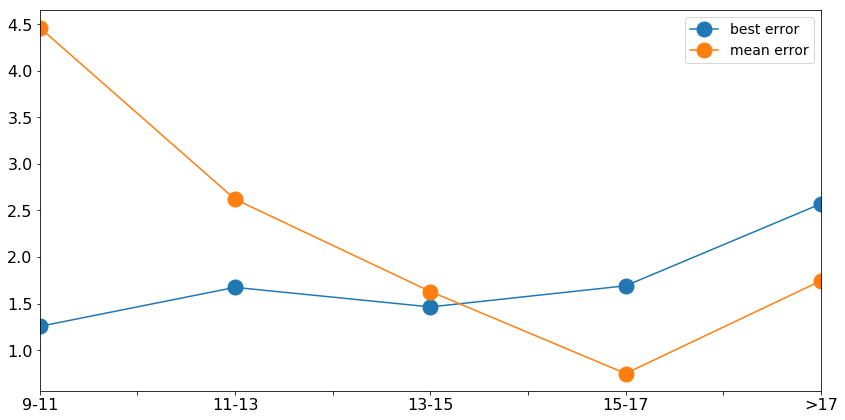

In [86]:
index = ['9-11', '11-13', '13-15', '15-17', '>17']
gra14 = pd.DataFrame({'mean error': mean7, 'best error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [87]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [88]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [89]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

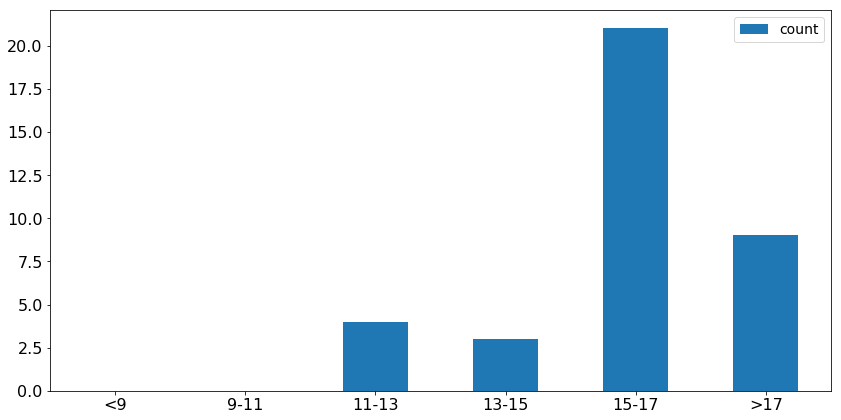

In [90]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [93]:

#m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
#m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_average_pace))

#m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
#m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_average_pace))

m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_average_pace))

m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_average_pace))

m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_average_pace))

m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_average_pace))


#print('Mas3 U9 Best Error:', m3g9B)
#print('Mas3 U9 Mean Error:', m3g9M)
#print('Mas3 9-11 Best Error:', m3g11B)
#print('Mas3 9-11 Mean Error:', m3g11M)
print('Mas3 11-13 Best Error:', m3g13B)
print('Mas3 11-13 Mean Error:', m3g13M)
print('Mas3 13-15 Best Error:', m3g15B)
print('Mas3 13-15 Mean Error:', m3g15M)
print('Mas3 15-17 Best Error:', m3g17B)
print('Mas3 15-17 Mean Error:', m3g17M)
print('Mas3 O17 Best Error:', m3g19B)
print('Mas3 017 Mean Error:', m3g19M)

Mas3 11-13 Best Error: 0.809093881430708
Mas3 11-13 Mean Error: 2.9885519952531214
Mas3 13-15 Best Error: 1.404660263091733
Mas3 13-15 Mean Error: 1.7721934131463253
Mas3 15-17 Best Error: 1.5594131530675477
Mas3 15-17 Mean Error: 0.6481976458501318
Mas3 O17 Best Error: 3.4308850571706366
Mas3 017 Mean Error: 1.8782360861668093


In [94]:
mean8 = [m3g13M, m3g15M, m3g17M, m3g19M]
best8 = [m3g13B, m3g15B, m3g17B, m3g19B]

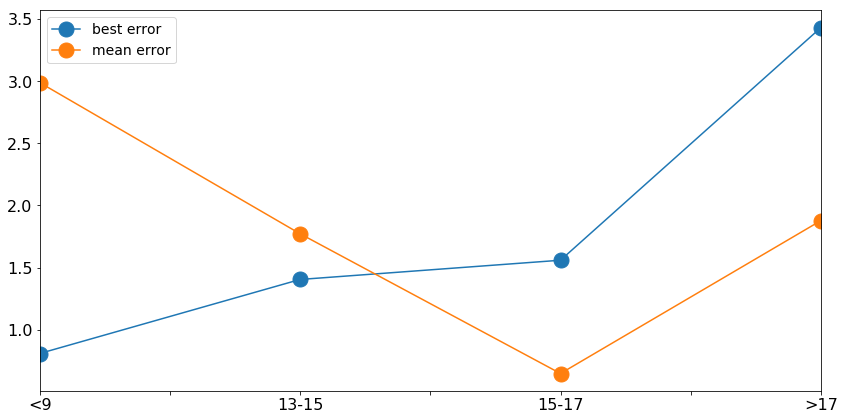

In [95]:
index = ['<9', '13-15', '15-17', '>17']
gra15 = pd.DataFrame({'mean error': mean8, 'best error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [96]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [97]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [98]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

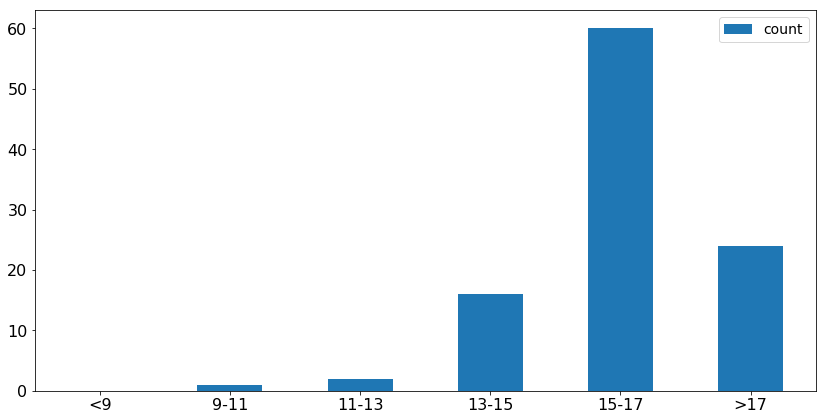

In [99]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [100]:


#w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
#w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_average_pace))

#w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
#w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_average_pace))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_average_pace))

w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_average_pace))

w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_average_pace))

w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_average_pace))


#print('Wom1 U9 Best Error:', w1g9B)
#print('Wom1 U9 Mean Error:', w1g9M)
#print('Wom1 9-11 Best Error:', w1g11B)
#print('Wom1 9-11 Mean Error:', w1g11M)
print('Wom1 11-13 Best Error:', w1g13B)
print('Wom1 11-13 Mean Error:', w1g13M)
print('Wom1 13-15 Best Error:', w1g15B)
print('Wom1 13-15 Mean Error:', w1g15M)
print('Wom1 15-17 Best Error:', w1g17B)
print('Wom1 15-17 Mean Error:', w1g17M)
print('Wom1 O17 Best Error:', w1g19B)
print('Wom1 017 Mean Error:', w1g19M)

Wom1 11-13 Best Error: 0.40705382100224
Wom1 11-13 Mean Error: 2.9972419522065943
Wom1 13-15 Best Error: 1.4546844647345458
Wom1 13-15 Mean Error: 1.9584572439471437
Wom1 15-17 Best Error: 1.3679525387700195
Wom1 15-17 Mean Error: 0.8030455740923887
Wom1 O17 Best Error: 2.847643898591985
Wom1 017 Mean Error: 1.8860129321063233


In [101]:
mean9 = [w1g13M, w1g15M, w1g17M, w1g19M]
best9 = [w1g13B, w1g15B, w1g17B, w1g19B]

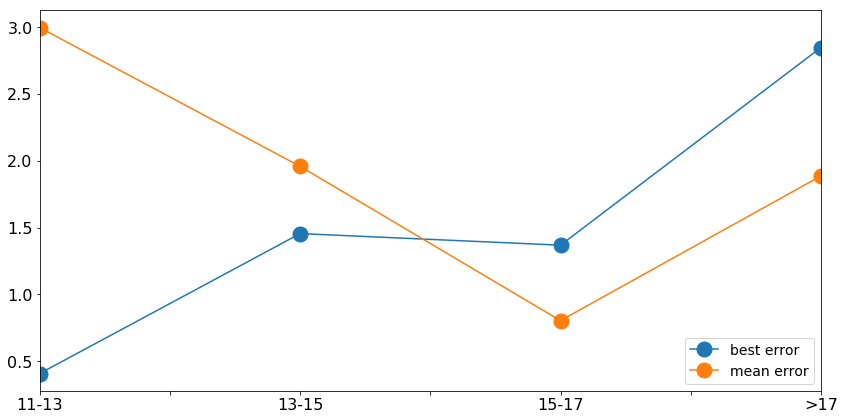

In [102]:
index = ['11-13', '13-15', '15-17', '>17']
gra16 = pd.DataFrame({'mean error': mean9, 'best error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [103]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [104]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [105]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

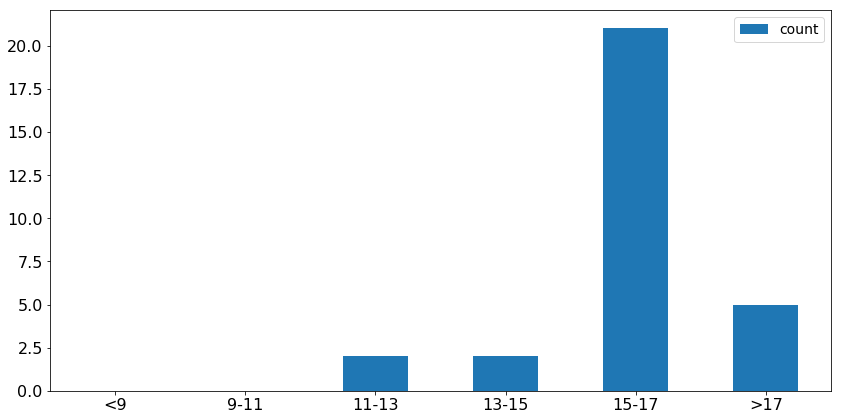

In [106]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [107]:

#w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
#w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_average_pace))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_average_pace))

w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_average_pace))

w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_average_pace))

w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_average_pace))

#w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
#w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_average_pace))


#print('Wom2 U9 Best Error:', w2g9B)
#print('Wom2 U9 Mean Error:', w2g9M)
#print('Wom2 9-11 Best Error:', w2g11B)
#print('Wom2 9-11 Mean Error:', w2g11M)
print('Wom2 11-13 Best Error:', w2g13B)
print('Wom2 11-13 Mean Error:', w2g13M)
print('Wom2 13-15 Best Error:', w2g15B)
print('Wom2 13-15 Mean Error:', w2g15M)
print('Wom2 15-17 Best Error:', w2g17B)
print('Wom2 15-17 Mean Error:', w2g17M)
#print('Wom2 O17 Best Error:', w2g19B)
#print('Wom2 017 Mean Error:', w2g19M)

Wom2 11-13 Best Error: 1.0288499377994822
Wom2 11-13 Mean Error: 0.0
Wom2 13-15 Best Error: 2.0641880142361533
Wom2 13-15 Mean Error: 2.1292432734925812
Wom2 15-17 Best Error: 0.979990000062306
Wom2 15-17 Mean Error: 0.5302977579414158


In [108]:
mean10 = [w2g13M, w2g15M, w2g17M]
best10 = [w2g13B, w2g15B, w2g17B]

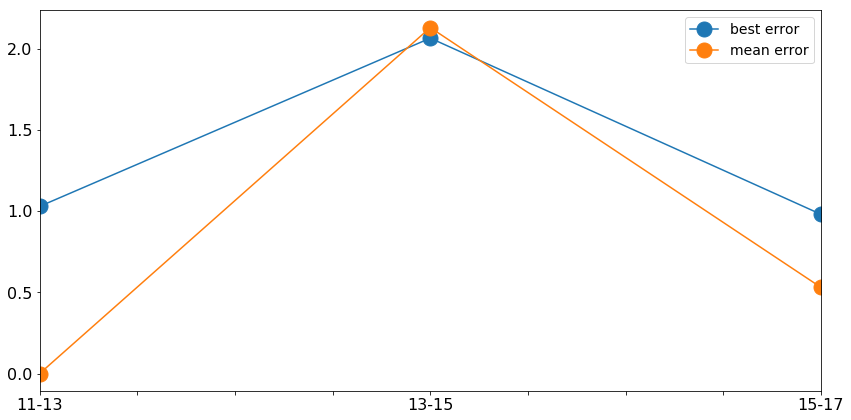

In [109]:
index = ['11-13', '13-15', '15-17']
gra18 = pd.DataFrame({'mean error': mean10, 'best error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [110]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [111]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [112]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

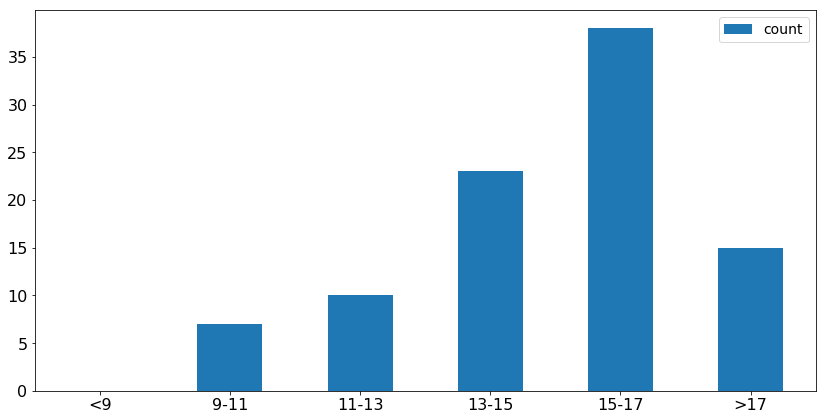

In [113]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [114]:

#sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
#sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_average_pace))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_average_pace))

sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_average_pace))

sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_average_pace))

sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_average_pace))

sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_average_pace))


#print('Senior Women U9 Best Error:', sw9B)
#print('Senior Women U9 Mean Error:', sw9M)
print('Senior Women 9-11 Best Error:', sw11B)
print('Senior Women 9-11 Mean Error:', sw11M)
print('Senior Women 11-13 Best Error:', sw13B)
print('Senior Women 11-13 Mean Error:', sw13M)
print('Senior Women 13-15 Best Error:', sw15B)
print('Senior Women 13-15 Mean Error:', sw15M)
print('Senior Women 15-17 Best Error:', sw17B)
print('Senior Women 15-17 Mean Error:', sw17M)
print('Senior Women O17 Best Error:', sw19B)
print('Senior Women 017 Mean Error:', sw19M)

Senior Women 9-11 Best Error: 1.988025886334311
Senior Women 9-11 Mean Error: 2.90989556856393
Senior Women 11-13 Best Error: 2.241154950864981
Senior Women 11-13 Mean Error: 2.091393860297196
Senior Women 13-15 Best Error: 1.7779854166244866
Senior Women 13-15 Mean Error: 1.350048002056249
Senior Women 15-17 Best Error: 2.4531240942073866
Senior Women 15-17 Mean Error: 0.9672259183801806
Senior Women O17 Best Error: 3.5042630500821788
Senior Women 017 Mean Error: 1.5685703433393259


In [115]:
mean11 = [ sw11M, sw13M, sw15M, sw17M, sw19M]
best11 = [ sw11B, sw13B, sw15B, sw17B, sw19B]

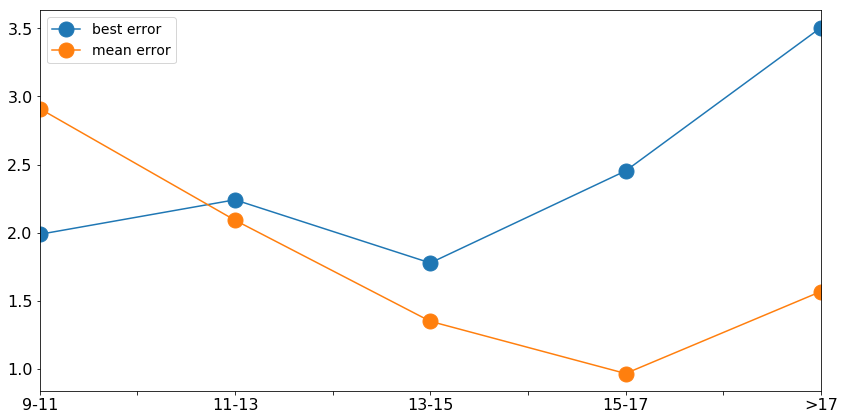

In [116]:
index = [ '9-11', '11-13', '13-15', '15-17', '>17']
gra18 = pd.DataFrame({'mean error': mean11, 'best error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [117]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [118]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [119]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

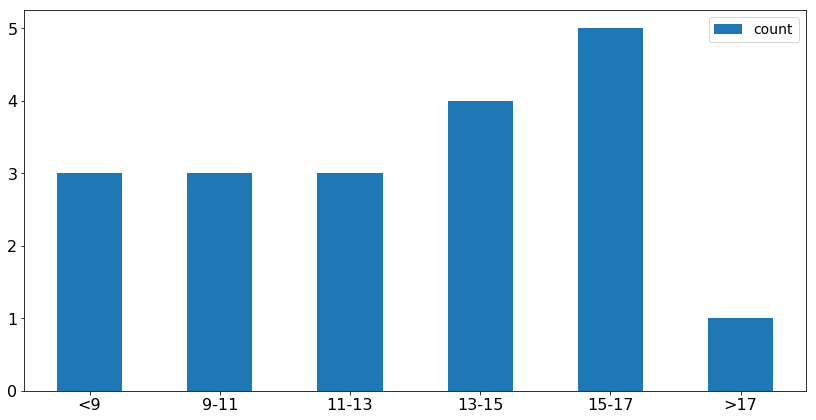

In [120]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [121]:


#you9B = sqrt(mean_squared_error(you9.query_pb, you9.best_pb_prediction))
#you9M = sqrt(mean_squared_error(you9.query_pb, you9.mean_pb_average_pace))

#you11B = sqrt(mean_squared_error(you11.query_pb, you11.best_pb_prediction))
#you11M = sqrt(mean_squared_error(you11.query_pb, you11.mean_pb_average_pace))

#you13B = sqrt(mean_squared_error(you13.query_pb, you13.best_pb_prediction))
#you13M = sqrt(mean_squared_error(you13.query_pb, you13.mean_pb_average_pace))

you15B = sqrt(mean_squared_error(you15.query_pb, you15.best_pb_prediction))
you15M = sqrt(mean_squared_error(you15.query_pb, you15.mean_pb_average_pace))

you17B = sqrt(mean_squared_error(you17.query_pb, you17.best_pb_prediction))
you17M = sqrt(mean_squared_error(you17.query_pb, you17.mean_pb_average_pace))

#you19B = sqrt(mean_squared_error(you19.query_pb, you19.best_pb_prediction))
#you19M = sqrt(mean_squared_error(you19.query_pb, you19.mean_pb_average_pace))


#print('Youth Men U9 Best Error:', you9B)
#print('Youth Men U9 Mean Error:', you9M)
#print('Youth Men 9-11 Best Error:', you11B)
#print('Youth Men 9-11 Mean Error:', you11M)
#print('Youth Men 11-13 Best Error:', you13B)
#print('Youth Men 11-13 Mean Error:', you13M)
print('Youth Men 13-15 Best Error:', you15B)
print('Youth Men 13-15 Mean Error:', you15M)
print('Youth Men 15-17 Best Error:', you17B)
print('Youth Men 15-17 Mean Error:', you17M)
#print('Youth Men O17 Best Error:', you19B)
#print('Youth Men 017 Mean Error:', you19M)

Youth Men 13-15 Best Error: 2.0749735785581542
Youth Men 13-15 Mean Error: 1.4650043182773327
Youth Men 15-17 Best Error: 5.8796583291489535
Youth Men 15-17 Mean Error: 3.2022858319616723
